In [176]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 8)

# Read in the data
general = pd.read_csv("task/test/general.csv")
prenatal = pd.read_csv("task/test/prenatal.csv")
sports = pd.read_csv("task/test/sports.csv")


In [3]:
# Rename for clarity and overlapping columns
prenatal.rename(columns={"HOSPITAL": "hospital", "Sex": "gender"}, inplace=True)
sports.rename(columns={"Hospital": "hospital", "Male/female": "gender"}, inplace=True)

# Merge all the DataFrame
concat_df = pd.concat([general, prenatal, sports], ignore_index=True)
concat_df.drop(columns=["Unnamed: 0"], inplace=True)


In [5]:
# Stage 3
# Change "Female" in gender column to "f"
concat_df.gender.replace("female", "f", inplace=True)
concat_df.gender.replace("male", "m", inplace=True)
concat_df.gender.replace("man", "m", inplace=True)
concat_df.gender.replace("woman", "f", inplace=True)
# Change the NaN values in gender column to "f" if the hospital is prenatal
concat_df.loc[
    ((concat_df.hospital == "prenatal") & (concat_df.gender.isna())), "gender"
] = "f"
# Replace NaN values in some columns with zeros
concat_df.loc[(concat_df.mri.isna()), "mri"] = 0
concat_df.loc[(concat_df.bmi.isna()), "bmi"] = 0
concat_df.loc[(concat_df.blood_test.isna()), "blood_test"] = 0
concat_df.loc[(concat_df.ecg.isna()), "ecg"] = 0
concat_df.loc[(concat_df.ultrasound.isna()), "ultrasound"] = 0
concat_df.loc[(concat_df.xray.isna()), "xray"] = 0
concat_df.loc[(concat_df.children.isna()), "children"] = 0
concat_df.loc[(concat_df.months.isna()), "months"] = 0
concat_df.dropna(inplace=True)


In [72]:
# Stage 4
# Q1 - Which hospital has the highest number of patients?
print(
    "The answer to the 1st question is", concat_df.groupby(["hospital"]).size().idxmax()
)
# Q2 - What share of the patients in the general hospital suffers from stomach-related issues? Round the result to the third decimal place.
print(
    "The answer to the 2nd question is",
    round(
        concat_df.loc[
            (concat_df.hospital == "general") & (concat_df.diagnosis == "stomach"),
            "diagnosis",
        ].count()
        / concat_df.loc[(concat_df.hospital == "general"), "diagnosis"].count(),
        3,
    ),
)
# Q3 - What share of the patients in the sports hospital suffers from dislocation-related issues? Round the result to the third decimal place.
print(
    "The answer to the 3rd question is",
    round(
        concat_df.loc[
            (concat_df.hospital == "sports") & (concat_df.diagnosis == "dislocation"),
            "diagnosis",
        ].count()
        / concat_df.loc[(concat_df.hospital == "sports"), "diagnosis"].count(),
        3,
    ),
)
# Q4 - What is the difference in the median ages of the patients in the general and sports hospitals?
general_sports_median = concat_df.loc[concat_df.hospital == "general", "age"].median()
sports_general_median = concat_df.loc[concat_df.hospital == "sports", "age"].median()
print(
    "The answer to the 4th question is",
    int(general_sports_median - sports_general_median),
)
"""
Q5 - After data processing at the previous stages, the blood_test column has three values: t= a blood test was taken, f= a blood test wasn't taken, 
and 0= there is no information. In which hospital the blood test was taken the most often (there is the biggest number of t in the blood_test column 
among all the hospitals)? How many blood tests were taken?
"""
hospital_blood_test_df = pd.concat([concat_df.hospital, concat_df.blood_test], axis=1)
# Count the blood test is equal to t
blood_test_df = (
    hospital_blood_test_df.loc[hospital_blood_test_df.blood_test == "t"]
    .groupby(hospital_blood_test_df.hospital)
    .count()
)
hospital_name = blood_test_df.idxmax()[0]
print(
    "The answer to the 5th question is",
    hospital_name + ",",
    blood_test_df.max()[0],
    "blood tests",
)


The answer to the 1st question is general
The answer to the 2nd question is 0.325
The answer to the 3rd question is 0.285
The answer to the 4th question is 19
The answer to the 5th question is prenatal, 325 blood tests


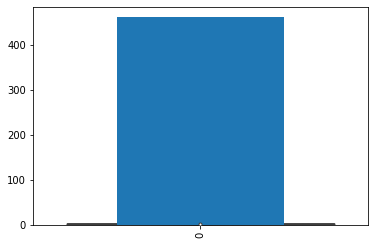

In [178]:
# Stage 5
plt.figure(1)
intervals = [0, 15, 35, 55, 70, 80]
new_df = pd.concat([concat_df.age, concat_df.hospital], axis=1)
new_df.age = pd.cut(new_df.age, intervals)
print("The answer to the 1st question:",
        str(new_df.age.value_counts().idxmax().left) + "-" + str(new_df.age.value_counts().idxmax().right))
new_df.age.value_counts().plot(kind="hist")
plt.show()
plt.figure(2)
print("The answer to the 2nd question: pregnancy")
plt.pie(concat_df.diagnosis.value_counts())
plt.show()
plt.figure(3)
# Build a violin plot of height distribution by hospitals.
sns.violinplot(data=concat_df.height)
plt.show()




In [6]:
print("Data shape:", concat_df.shape)
print(pd.DataFrame.sample(n=20, random_state=30, self=concat_df))


Data shape: (1000, 14)
     hospital gender   age  height  ...  mri  xray children months
929    sports      f  23.0   6.809  ...    t     f      0.0    0.0
927    sports      m  21.0   6.052  ...    t     f      0.0    0.0
516  prenatal      f  20.0   1.650  ...    0     f      1.0    4.0
87    general      m  54.0   1.720  ...    0     0      0.0    0.0
885    sports      f  16.0   5.915  ...    t     f      0.0    0.0
463  prenatal      f  34.0   1.650  ...    0     f      1.0    5.0
112   general      m  77.0   1.690  ...    0     0      0.0    0.0
297   general      m  56.0   1.480  ...    0     0      0.0    0.0
417   general      f  26.0   1.650  ...    0     0      0.0    0.0
660  prenatal      f  38.0   1.590  ...    0     f      1.0    4.0
344   general      f  60.0   1.410  ...    0     0      0.0    0.0
834    sports      f  21.0   5.585  ...    f     t      0.0    0.0
10    general      m  27.0   1.850  ...    0     0      0.0    0.0
56    general      m  23.0   1.650  ...